In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset (replace 'data.csv' with your actual filename)
df = pd.read_excel("data.xlsx")  

In [3]:
# Display first few rows
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [4]:
# Check basic info
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


In [5]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [6]:
# Create a mapping of StockCode to Description (excluding NaNs)
description_map = df.dropna().set_index('StockCode')['Description'].to_dict()

# Fill missing descriptions by matching StockCode
df['Description'] = df.apply(lambda row: description_map.get(row['StockCode'], row['Description']), axis=1)

In [7]:
# Convert CustomerID to integer
df['CustomerID'] = df['CustomerID'].fillna(0)  # Replace NaN with 0
df['CustomerID'] = df['CustomerID'].replace([np.inf, -np.inf], 0)  # Replace inf with 0
df['CustomerID'] = df['CustomerID'].astype(int)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
            Quantity                    InvoiceDate      UnitPrice  \
count  536639.000000                         536639  536639.000000   
mean        9.619500  2011-07-04 08:56:52.349270784       4.632660   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 10:52:00       1.250000   
50%         3.000000            2011-07-19 14:04:00       2.080000   
75%        10.000000            2011-10-18 17:05:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       219.130206                            NaN      97.233299   

          CustomerID  
count  536639.000000  
mean    11435.899122  
min         0.000000  
25%         0.000000  
50%     14336.000000  
75%     16241.000000  
max     18287.000000  
std      6795.056308  


In [8]:
# Unique products count
print("\nNumber of Unique Products:", df['StockCode'].nunique())

# Unique customers count
print("Number of Unique Customers:", df['CustomerID'].nunique())

# Total transactions
print("Total Transactions:", df['InvoiceNo'].nunique())


Number of Unique Products: 4070
Number of Unique Customers: 4373
Total Transactions: 25900


In [9]:
# Top 10 best-selling products
top_products = df.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Best-Selling Products:")
print(top_products)


Top 10 Best-Selling Products:
Description
POPCORN HOLDER                        56427
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53751
JUMBO BAG RED RETROSPOT               47260
CREAM HANGING HEART T-LIGHT HOLDER    38811
ASSORTED COLOUR BIRD ORNAMENT         36122
PACK OF 72 RETROSPOT CAKE CASES       36016
RABBIT NIGHT LIGHT                    30597
MINI PAINT SET VINTAGE                26437
PACK OF 12 LONDON TISSUES             26299
PACK OF 60 PINK PAISLEY CAKE CASES    24719
Name: Quantity, dtype: int64


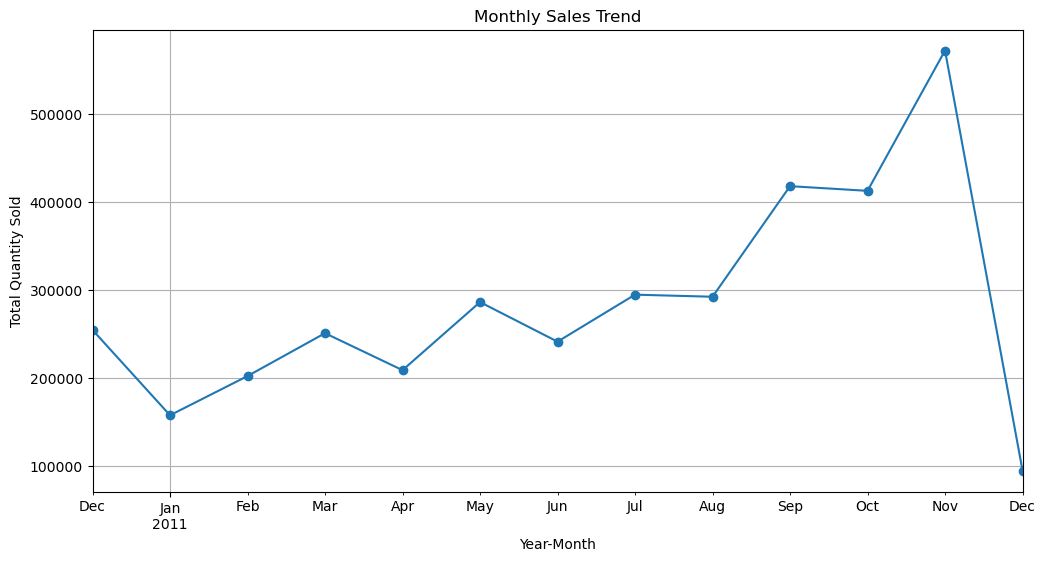

In [10]:

# Downcast numeric columns
df['Quantity'] = pd.to_numeric(df['Quantity'], downcast='integer')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Remove outliers
q99 = df['Quantity'].quantile(0.99)
df_filtered = df[df['Quantity'] <= q99]

# Monthly Sales Trend
monthly_sales = df_filtered.groupby(df_filtered['InvoiceDate'].dt.to_period('M'))['Quantity'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Year-Month")
plt.ylabel("Total Quantity Sold")
plt.grid()
plt.show()

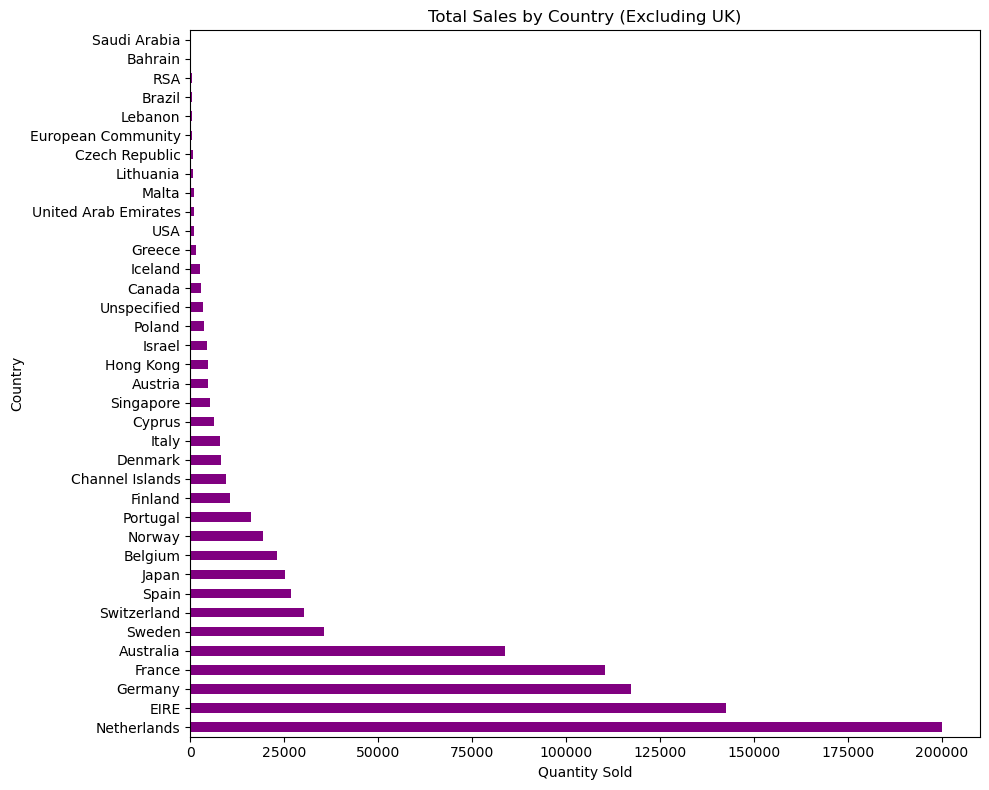

In [11]:
country_sales = df.groupby("Country")["Quantity"].sum().sort_values(ascending=False)
country_sales = country_sales[country_sales.index != "United Kingdom"]
plt.figure(figsize=(10, 8))
country_sales.plot(kind="barh", color="purple")  
plt.title("Total Sales by Country (Excluding UK)")
plt.xlabel("Quantity Sold")
plt.tight_layout()
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      305 non-null    object
 1   y       305 non-null    int32 
dtypes: int32(1), object(1)
memory usage: 3.7+ KB
None
           ds      y
0  2010-12-01  26713
1  2010-12-02  20958
2  2010-12-03  14789
3  2010-12-05  16187
4  2010-12-06  21243
ADF Statistic: -0.757749077970517
p-value: 0.8312191109784703
Non-Stationary


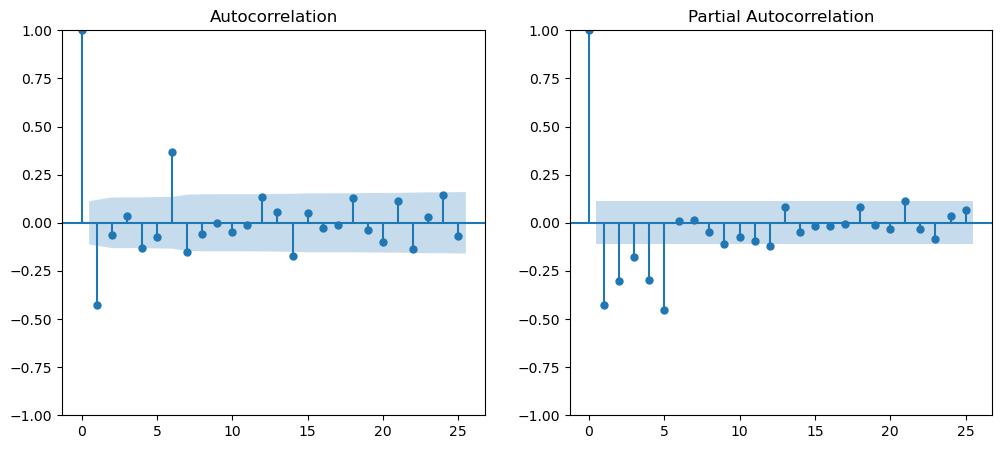

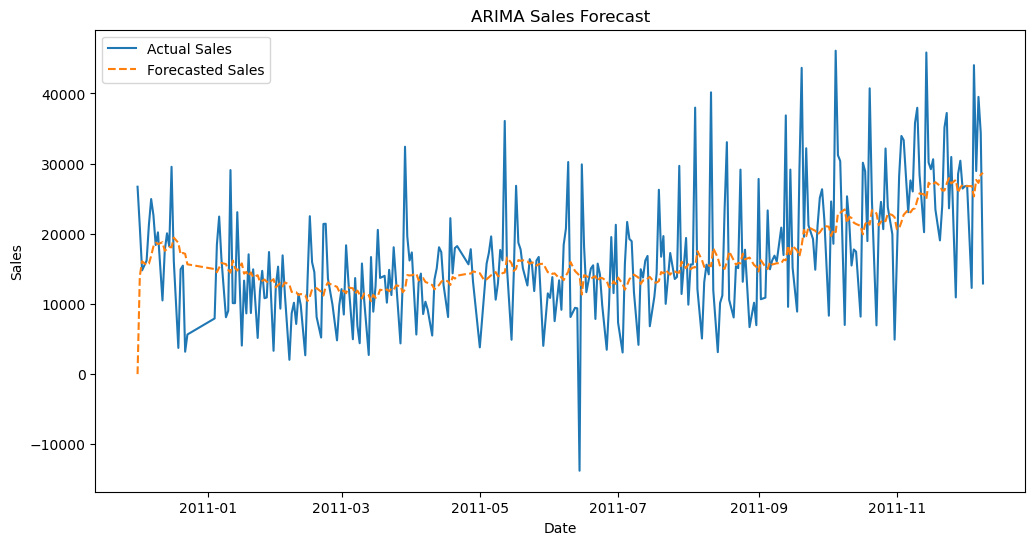

In [13]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

# Aggregate sales by date
df = df.groupby(df["InvoiceDate"].dt.date)["Quantity"].sum().reset_index()

# Rename columns to match ARIMA's expectations
df.columns = ["ds", "y"]

# Verify the structure
print(df.info())  # Check column names and data types
print(df.head())  # See the first few rows


def test_stationarity(timeseries):
    result = adfuller(timeseries)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Stationary' if result[1] < 0.05 else 'Non-Stationary')

test_stationarity(df['y'])

# Step 4: Make Data Stationary (if needed)
df['y_diff'] = df['y'].diff().dropna()

# Step 5: Find ARIMA Parameters (p, d, q)
# Auto-correlation (ACF) and Partial Auto-correlation (PACF) plots help in selecting p & q
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sm.graphics.tsa.plot_acf(df['y_diff'].dropna(), ax=axes[0])
sm.graphics.tsa.plot_pacf(df['y_diff'].dropna(), ax=axes[1])
plt.show()

# Step 6: Train ARIMA Model
model = ARIMA(df['y'], order=(1,1,1))  # (p, d, q) values chosen based on ACF/PACF
arima_result = model.fit()

# Step 7: Make Future Predictions
df['forecast'] = arima_result.predict(start=0, end=len(df) + 30)  # Forecast 30 days ahead

# Step 8: Visualize Results
plt.figure(figsize=(12, 6))
plt.plot(df['ds'], df['y'], label="Actual Sales")
plt.plot(df['ds'], df['forecast'], label="Forecasted Sales", linestyle="dashed")
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('ARIMA Sales Forecast')
plt.legend()
plt.show()

In [14]:
from pmdarima import auto_arima

auto_model = auto_arima(df["y"], seasonal=True, m=12, trace=True, stepwise=True)
print(auto_model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=2.12 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=6488.938, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=6414.942, Time=0.14 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=6303.934, Time=0.86 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=6486.945, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=6311.639, Time=0.21 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=6295.481, Time=1.17 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=6314.007, Time=0.35 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=6310.586, Time=1.53 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=6310.604, Time=2.17 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=6314.874, Time=1.18 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=6298.543, Time=1.84 sec
 ARIMA(0,1,1)(2,0,2)[12] intercept   : AIC=inf, Time=3.90 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=6477.366, Time=0.35 sec
 ARIMA(1,1,1)(1,0,1)[12] inte

In [15]:
df["y_diff"] = df["y"].diff().diff().dropna()


In [16]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(df["y"], order=(1,1,1), seasonal_order=(1,1,1,12))
result = model.fit()
df["forecast"] = result.predict(start=0, end=len(df) + 30)


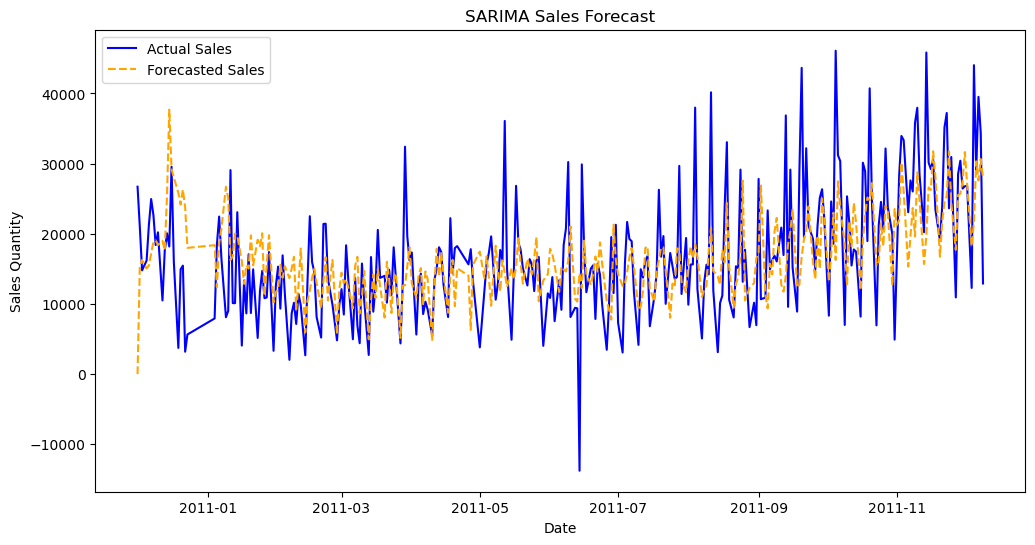

In [17]:
import matplotlib.pyplot as plt

# Plot the actual sales
plt.figure(figsize=(12, 6))
plt.plot(df["ds"], df["y"], label="Actual Sales", color="blue")

# Plot the forecasted sales
plt.plot(df["ds"], df["forecast"], label="Forecasted Sales", linestyle="dashed", color="orange")

# Labels and title
plt.xlabel("Date")
plt.ylabel("Sales Quantity")
plt.title("SARIMA Sales Forecast")
plt.legend()

# Show the plot
plt.show()
